In [1]:
import pandas as pd
import numpy as np
import json
import emoji
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json('synthetic_10000.jsonl', lines=True)
df.head()

,tweet_text,persona,style,labels
0,can't even take a breath without thinking abou...,struggling student,angry and ranting,"{'Cost of Living': 0, 'Healthcare': 0, 'Educat..."
1,just paid my uni fees on time 🙌😅 no more stres...,struggling student,using slang and emojis,"{'Cost of Living': 0, 'Healthcare': 0, 'Educat..."
2,Just spent millions on sustainable practices i...,wealthy business owner,angry and ranting,"{'Cost of Living': 0, 'Healthcare': 0, 'Educat..."
3,Just saw my pensioner friends' council tax sky...,retired teacher,angry and ranting,"{'Cost of Living': 1, 'Healthcare': 0, 'Educat..."
4,"Ugh, just got the bill for my kid's meds 🤯💸 an...",tired parent,using slang and emojis,"{'Cost of Living': 0, 'Healthcare': -1, 'Educa..."


In [3]:
df['labels'][0]

{'Cost of Living': 0,
 'Healthcare': 0,
 'Education': 0,
 'Personal Security': 0,
 'Employment': 0,
 'Transportation': 0,
 'Government': 0,
 'Environment': -1,
 'Social Equality': 0,
 'Taxation': 0}

In [4]:
labels_expanded = df['labels'].apply(pd.Series)

# 2. מחברים את הטבלה החדשה לטבלה המקורית וזורקים את עמודת ה-labels הישנה
df = pd.concat([df.drop(columns=['labels']), labels_expanded], axis=1)

# הצגת התוצאה
df.head()

,tweet_text,persona,style,Cost of Living,Healthcare,Education,Personal Security,Employment,Transportation,Government,Environment,Social Equality,Taxation
0,can't even take a breath without thinking abou...,struggling student,angry and ranting,0,0,0,0,0,0,0,-1,0,0
1,just paid my uni fees on time 🙌😅 no more stres...,struggling student,using slang and emojis,0,0,0,0,0,0,0,0,0,1
2,Just spent millions on sustainable practices i...,wealthy business owner,angry and ranting,0,0,0,0,0,0,0,-1,0,0
3,Just saw my pensioner friends' council tax sky...,retired teacher,angry and ranting,1,0,0,0,0,0,0,0,0,-1
4,"Ugh, just got the bill for my kid's meds 🤯💸 an...",tired parent,using slang and emojis,0,-1,0,0,0,0,0,0,1,0


In [5]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: emoji.replace_emoji(x, replace=''))

df.head()

,tweet_text,persona,style,Cost of Living,Healthcare,Education,Personal Security,Employment,Transportation,Government,Environment,Social Equality,Taxation
0,can't even take a breath without thinking abou...,struggling student,angry and ranting,0,0,0,0,0,0,0,-1,0,0
1,just paid my uni fees on time no more stressi...,struggling student,using slang and emojis,0,0,0,0,0,0,0,0,0,1
2,Just spent millions on sustainable practices i...,wealthy business owner,angry and ranting,0,0,0,0,0,0,0,-1,0,0
3,Just saw my pensioner friends' council tax sky...,retired teacher,angry and ranting,1,0,0,0,0,0,0,0,0,-1
4,"Ugh, just got the bill for my kid's meds and ...",tired parent,using slang and emojis,0,-1,0,0,0,0,0,0,1,0


In [6]:
df.columns

Index(['tweet_text', 'persona', 'style', 'Cost of Living', 'Healthcare',
       'Education', 'Personal Security', 'Employment', 'Transportation',
       'Government', 'Environment', 'Social Equality', 'Taxation'],
      dtype='object')

In [7]:
persona_count = df['persona'].value_counts()
persona_count

persona
political activist        1499
struggling student        1480
wealthy business owner    1448
tired parent              1416
tech worker               1408
nurse                     1402
retired teacher           1347
Name: count, dtype: int64

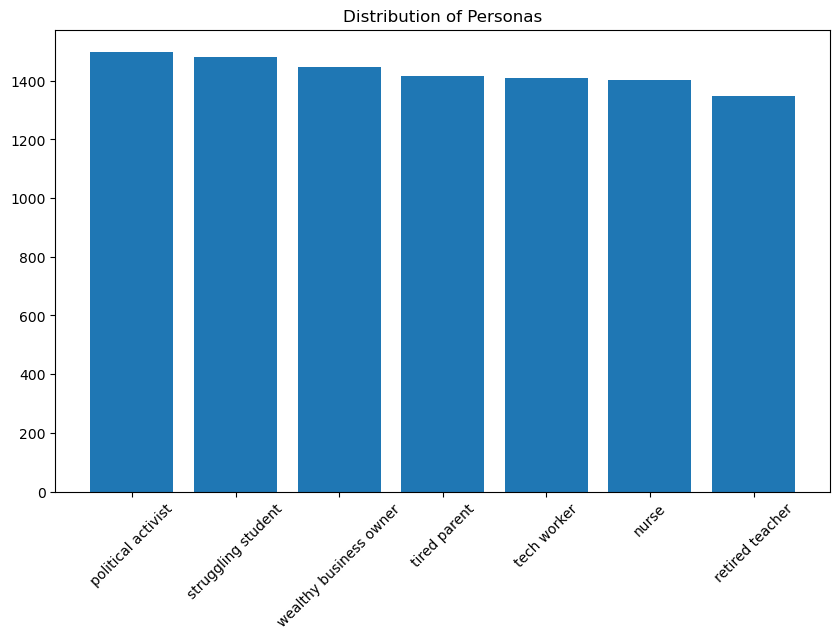

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(x=persona_count.index, height=persona_count.values)

plt.title('Distribution of Personas')
plt.xticks(rotation=45)
plt.show()

C:\Users\Shlomo\AppData\Local\Temp\ipykernel_14544\775032962.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=style_counts.values, y=style_counts.index, palette='viridis')


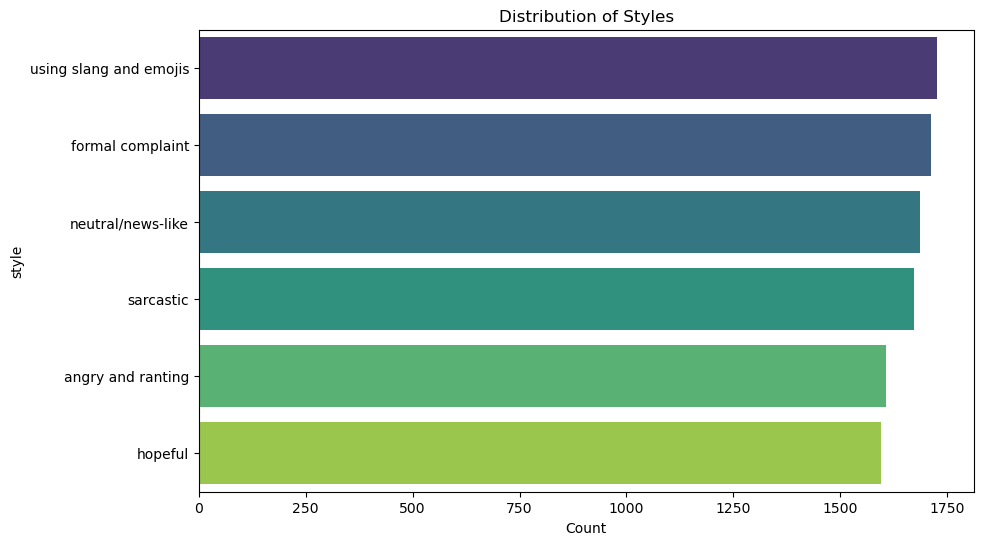

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# שלב 1: פירוק התאים רק לפי הפסיק המפריד
# זה מבטיח ש-"angry and ranting" יישאר שלם
# נניח שההפרדה בדאטא היא פסיק ורווח כמו ", "
styles_expanded = df['style'].str.split(', ').explode()

# שלב 2: ספירה
style_counts = styles_expanded.value_counts()

# שלב 3: ציור גרף שוכב (Horizontal Bar Plot)
# גרף שוכב הוא חובה כאן כי השמות שלך ארוכים
plt.figure(figsize=(10, 6))
sns.barplot(x=style_counts.values, y=style_counts.index, palette='viridis')

plt.title('Distribution of Styles')
plt.xlabel('Count')
plt.show()

In [10]:
topics = df.columns[3:]

<Figure size 1200x800 with 0 Axes>

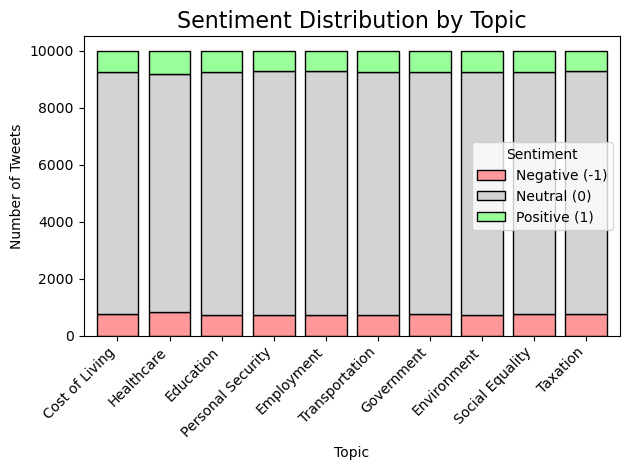

In [11]:
sentiment_counts = df[topics].apply(pd.Series.value_counts).fillna(0).T

# סידור העמודות בסדר הגיוני (שלילי -> ניטרלי -> חיובי)
# זה חשוב כדי שהצבעים יתאימו לערכים הנכונים
sentiment_counts = sentiment_counts[[-1, 0, 1]]

plt.figure(figsize=(12, 8))

sentiment_counts.plot(kind='bar', stacked=True, 
                      color=['#ff9999', '#d3d3d3', '#99ff99'], 
                      edgecolor='black', width=0.8)

plt.title('Sentiment Distribution by Topic', fontsize=16)
plt.ylabel('Number of Tweets')
plt.xlabel('Topic')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment', labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

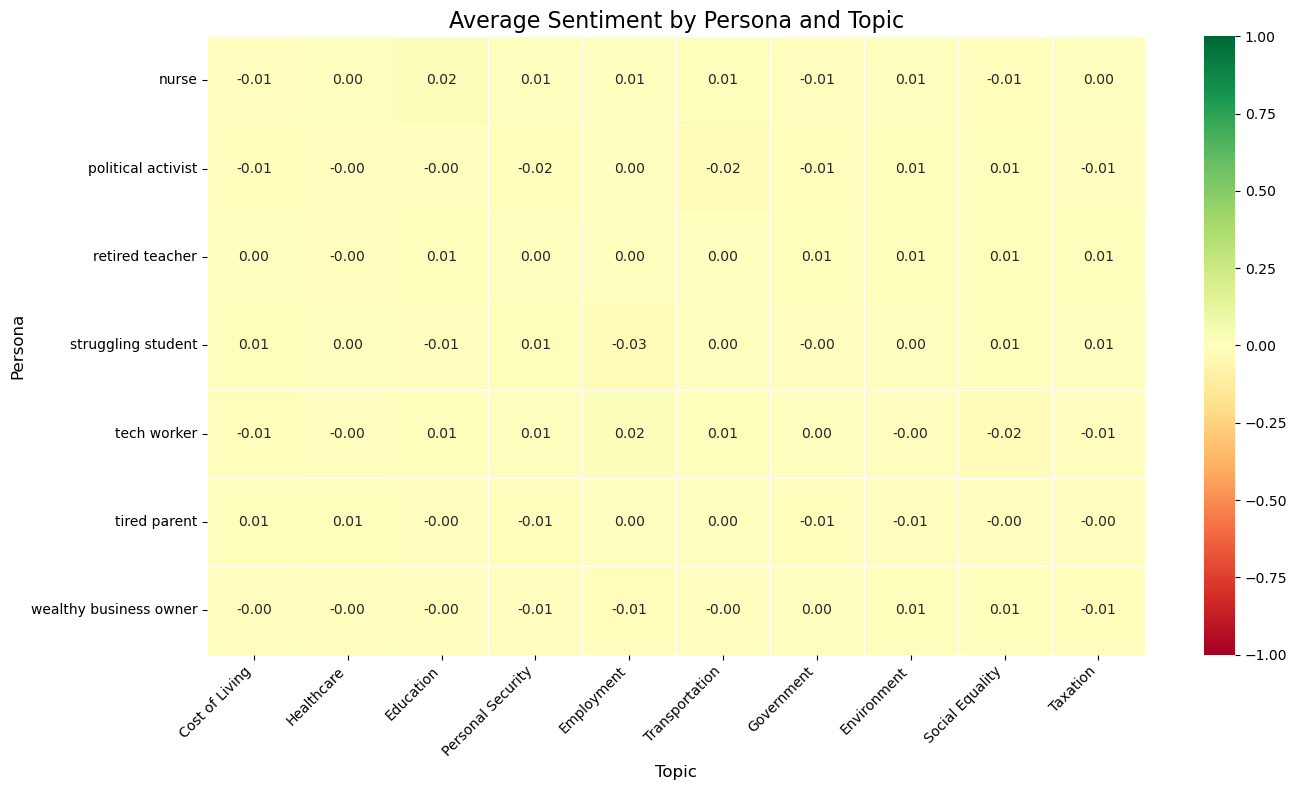

In [12]:
sentiment_mean = df.groupby('persona')[topics].mean()

plt.figure(figsize=(14, 8))

# הסבר לפרמטרים:
# annot=True: מציג את המספרים בתוך המשבצות
# cmap='RdYlGn': פלטת צבעים (Red-Yellow-Green) - אדום לנמוך, ירוק לגבוה
# center=0: מוודא שהצבע הניטרלי (צהוב/לבן) יהיה בול על ה-0
# vmin=-1, vmax=1: נועל את הסקאלה שתהיה בדיוק בין -1 ל-1 (ולא תלויה במינימום/מקסימום של הדאטה עצמו)
sns.heatmap(sentiment_mean, 
            annot=True, 
            fmt=".2f", 
            cmap='RdYlGn', 
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidths=.5)

plt.title('Average Sentiment by Persona and Topic', fontsize=16)
plt.ylabel('Persona', fontsize=12)
plt.xlabel('Topic', fontsize=12)
plt.xticks(rotation=45, ha='right') # סיבוב קל של השמות למטה שיהיה קריא

plt.tight_layout()
plt.show()

C:\Users\Shlomo\AppData\Local\Temp\ipykernel_14544\4218455910.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_exploded, x='avg_sentiment', y='style', palette='coolwarm')


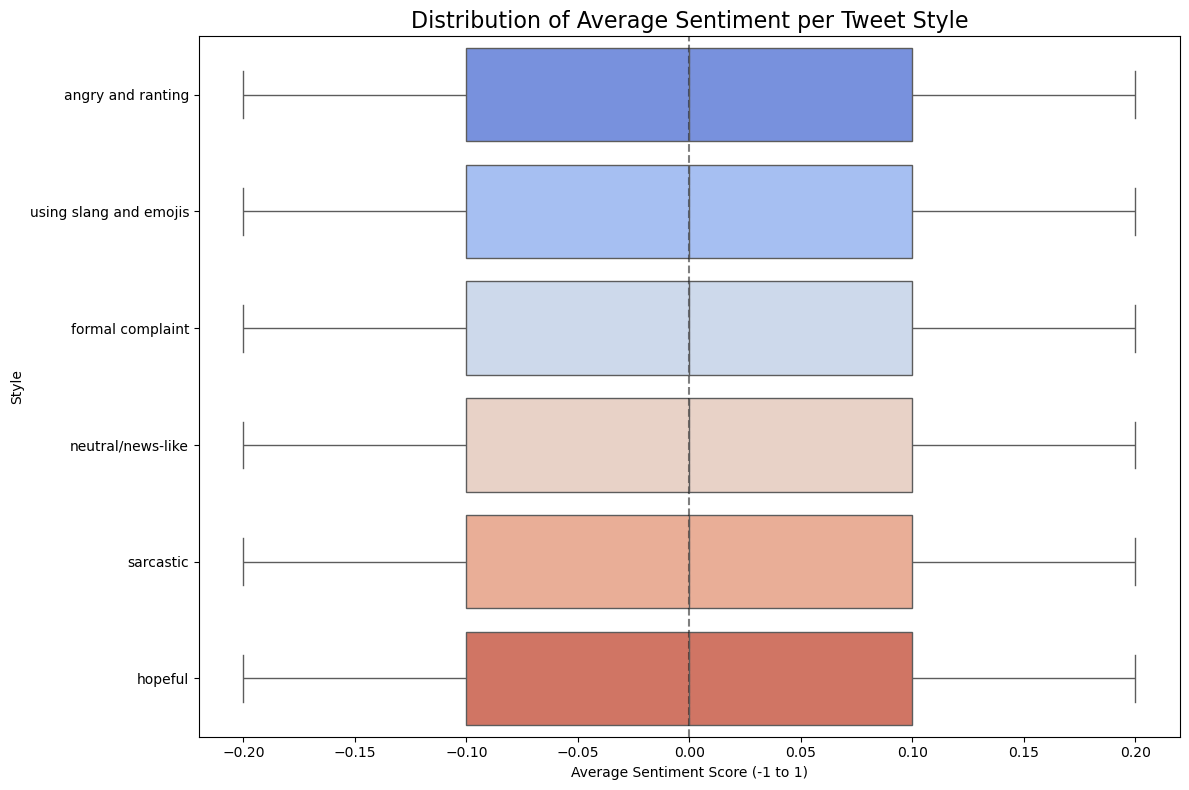

In [13]:
df['avg_sentiment'] = df[topics].mean(axis=1)

# 3. פירוק סגנונות (כדי שסגנונות מורכבים ייספרו בנפרד)
# אנו יוצרים דאטאפריים זמני רק לצורך הציור
df_exploded = df.assign(style=df['style'].str.split(', ')).explode('style')

# 4. ציור Box Plot
plt.figure(figsize=(12, 8))

# x = הסנטימנט (מספרי), y = הסגנון (קטגוריאלי) -> יוצר גרף שוכב
sns.boxplot(data=df_exploded, x='avg_sentiment', y='style', palette='coolwarm')

# קו אנכי ב-0 לנוחות הקריאה (מפריד בין חיובי לשלילי)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)

plt.title('Distribution of Average Sentiment per Tweet Style', fontsize=16)
plt.xlabel('Average Sentiment Score (-1 to 1)')
plt.ylabel('Style')

plt.tight_layout()
plt.show()

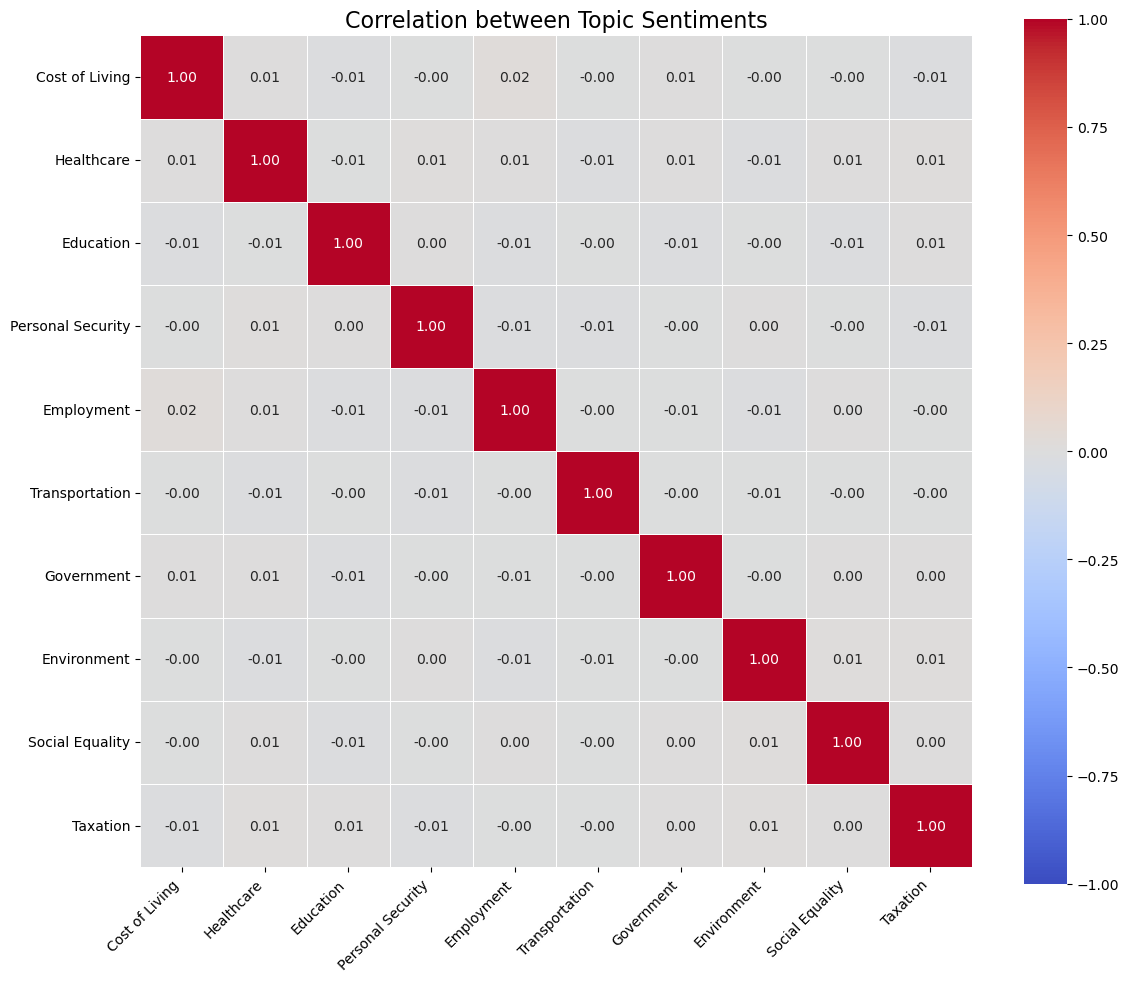

In [14]:
corr_matrix = df[topics].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=.5)

plt.title('Correlation between Topic Sentiments', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

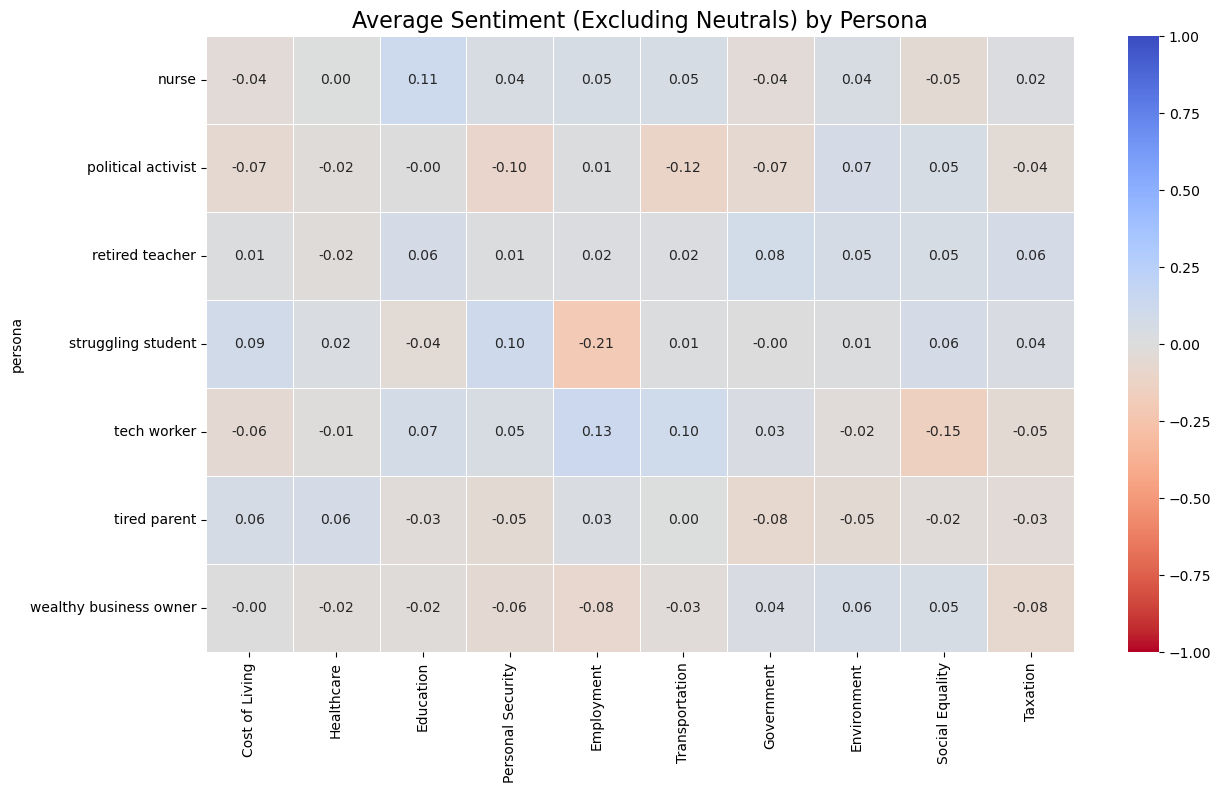

In [15]:
df_no_neutral = df.copy()
df_no_neutral[topics] = df_no_neutral[topics].replace(0, np.nan)

# עכשיו הממוצע יחושב רק על סמך 1 ו מינוס 1
# אם לפרסונה מסוימת היו רק אפסים בנושא מסוים, התא יישאר ריק (לבן)
sentiment_mean_active = df_no_neutral.groupby('persona')[topics].mean()

plt.figure(figsize=(14, 8))
sns.heatmap(sentiment_mean_active, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm_r',
            center=0, 
            vmin=-1, 
            vmax=1,
            linewidths=.5)

plt.title('Average Sentiment (Excluding Neutrals) by Persona', fontsize=16)
plt.show()

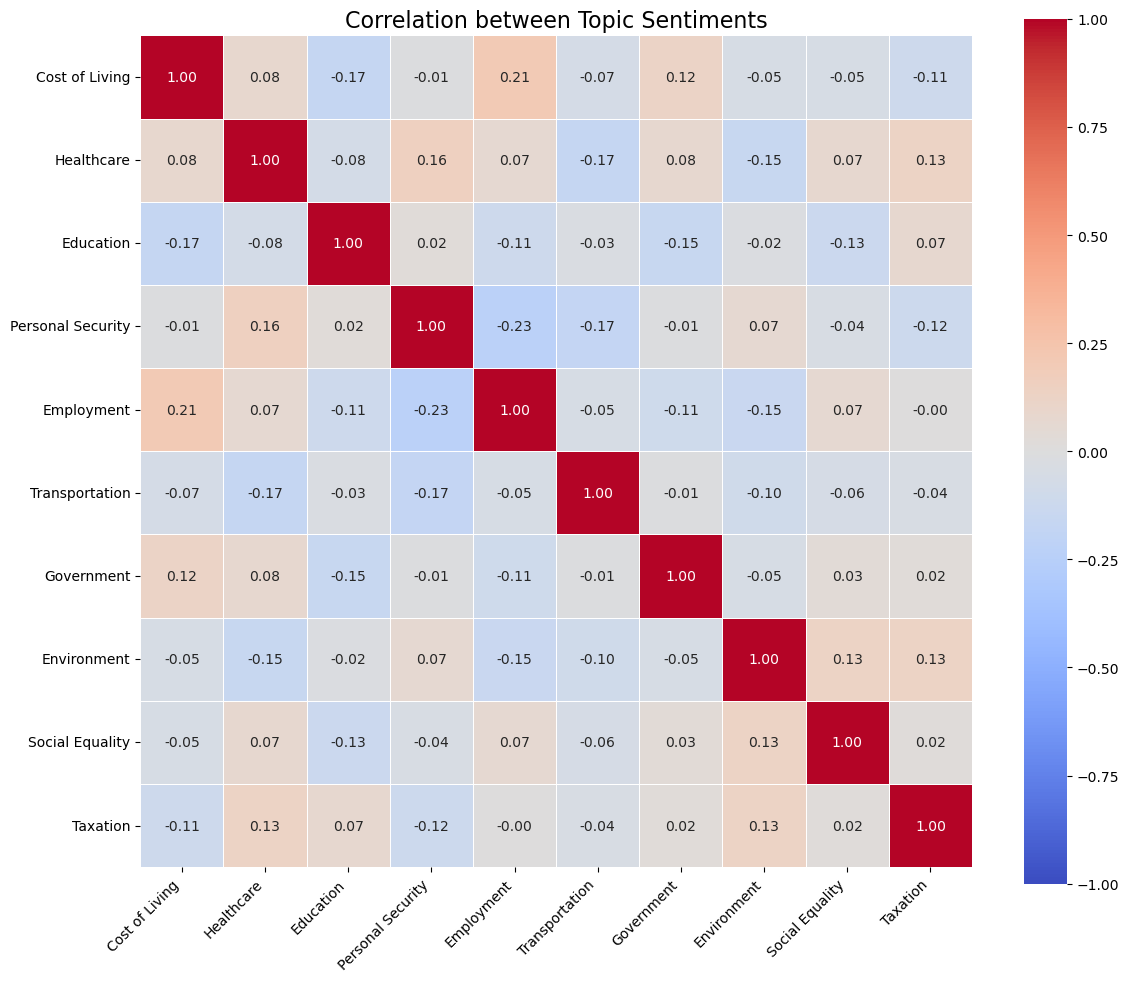

In [16]:
corr_matrix = df_no_neutral[topics].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1,
            square=True,
            linewidths=.5)

plt.title('Correlation between Topic Sentiments', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

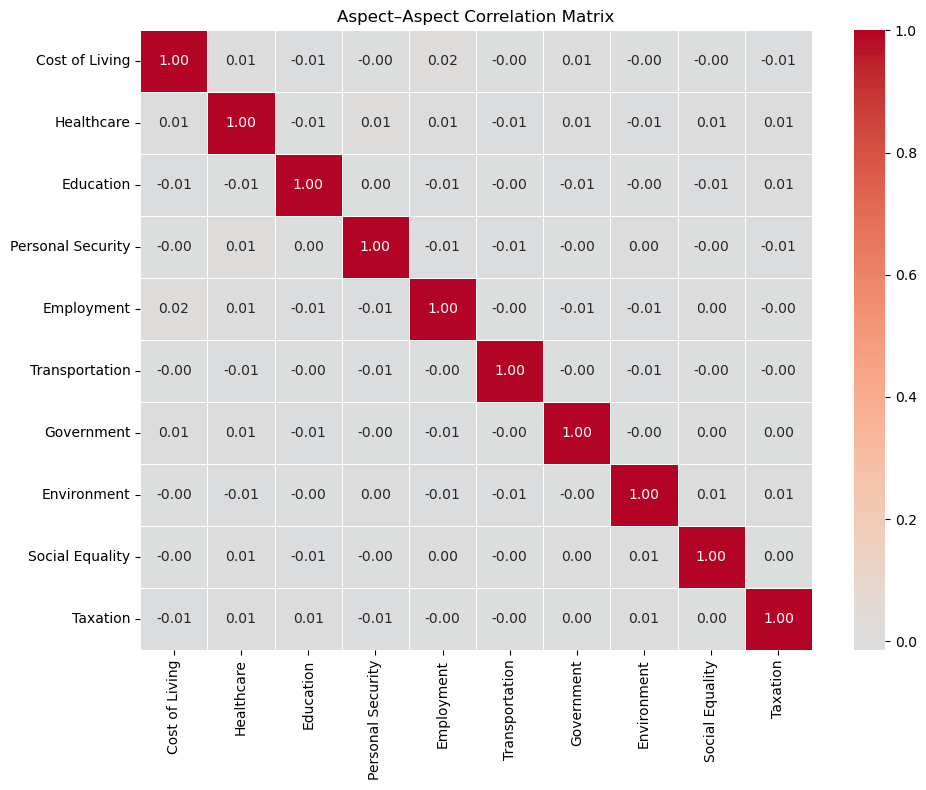

In [17]:
corr = df[topics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Aspect–Aspect Correlation Matrix")
plt.tight_layout()
plt.show()


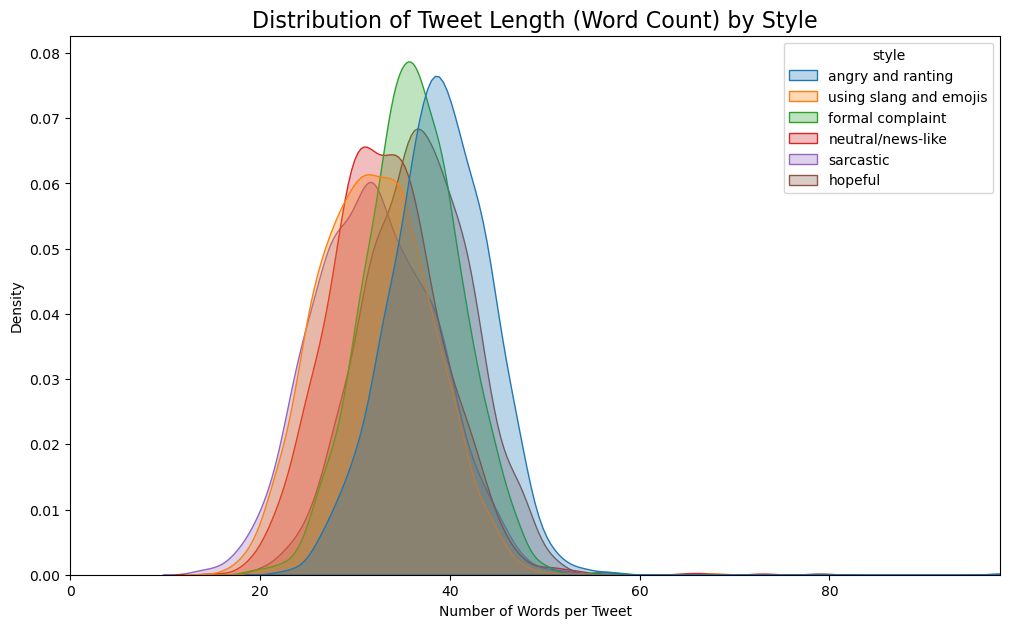

In [18]:
# 1. חישוב מספר המילים בכל טוויט
# אנו מפצלים לפי רווחים וסופרים את אורך הרשימה
df['word_count'] = df['tweet_text'].str.split().str.len()

# 2. פירוק סגנונות (Explode)
# כדי שכל סגנון יקבל את ההתפלגות שלו בנפרד
df_exploded = df.assign(style=df['style'].str.split(', ')).explode('style')

# 3. ציור KDE Plot (התפלגות צפיפות)
plt.figure(figsize=(12, 7))

# hue='style': צובע כל סגנון בצבע אחר
# fill=True: ממלא את השטח מתחת לקו (יותר ברור לעין)
# common_norm=False: חשוב מאוד! זה אומר שכל גרף מנורמל בפני עצמו לגובה 1. 
# בלי זה, סגנונות נדירים היו נראים שטוחים ובלתי נראים לעומת סגנונות נפוצים.
sns.kdeplot(data=df_exploded, 
            x='word_count', 
            hue='style', 
            fill=True, 
            common_norm=False, 
            palette='tab10',
            alpha=0.3) # שקיפות כדי שנראה חפיפות

plt.title('Distribution of Tweet Length (Word Count) by Style', fontsize=16)
plt.xlabel('Number of Words per Tweet')
plt.xlim(0, df['word_count'].max()) # מגביל את הציר כדי שלא יתחיל ממינוס
plt.show()

In [19]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


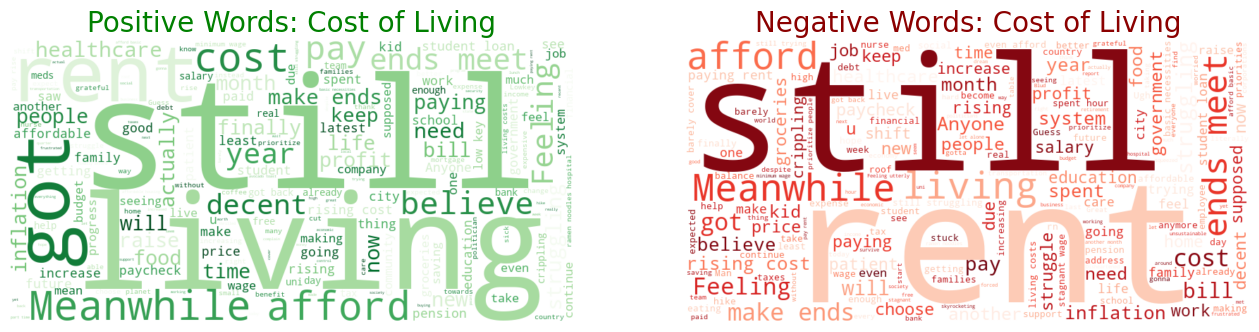

In [20]:
from wordcloud import WordCloud, STOPWORDS

def plot_sentiment_wordclouds(df, topic_name):
    """
    Plots two word clouds side by side: one for positive tweets and one for negative tweets
    regarding a specific topic.
    """
    
    # 1. סינון הטקסטים לפי הסנטימנט בנושא הנבחר
    # מחברים את כל הטוויטים החיוביים לטקסט אחד ארוך
    pos_text = " ".join(df[df[topic_name] == 1]['tweet_text'].astype(str))
    
    # מחברים את כל הטוויטים השליליים לטקסט אחד ארוך
    neg_text = " ".join(df[df[topic_name] == -1]['tweet_text'].astype(str))
    

    
    # בדיקת קצה: אם אין דאטה לאחד הצדדים
    if not pos_text or not neg_text:
        print(f"Not enough data to generate word clouds for {topic_name}")
        return

    # 2. הגדרת stopwords (מילים נפוצות שרוצים לסנן כמו the, is, a)
    stopwords = set(STOPWORDS)
    # אפשר להוסיף כאן מילים ספציפיות שרוצים להעיף, למשל:
    # stopwords.update(["tweet", "people", "think"]) 

    # 3. יצירת ענני המילים
    # ענן חיובי - נשתמש בפלטת צבעים ירוקה ('Greens')
    wc_pos = WordCloud(width=800, height=400, background_color='white', 
                       colormap='Greens', stopwords=stopwords).generate(pos_text)
    
    # ענן שלילי - נשתמש בפלטת צבעים אדומה ('Reds')
    wc_neg = WordCloud(width=800, height=400, background_color='white', 
                       colormap='Reds', stopwords=stopwords).generate(neg_text)
    

    # 4. ציור הגרף
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # צד ימין - חיובי
    axes[0].imshow(wc_pos, interpolation='bilinear')
    axes[0].set_title(f'Positive Words: {topic_name}', fontsize=20, color='green')
    axes[0].axis('off')
    
    # צד שמאל - שלילי
    axes[1].imshow(wc_neg, interpolation='bilinear')
    axes[1].set_title(f'Negative Words: {topic_name}', fontsize=20, color='darkred')
    axes[1].axis('off')
    
    
    plt.show()

# --- דוגמה לשימוש ---
# פשוט תחליף את המחרוזת בשם של כל נושא אחר שתרצה לבדוק
plot_sentiment_wordclouds(df, 'Cost of Living')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(df, target_persona, n=2, top_k=15):
    """
    n=2 עבור Bigrams (זוגות מילים)
    n=3 עבור Trigrams (שלשות מילים)
    """
    
    # 1. סינון הדאטה רק לפרסונה הרצויה
    subset = df[df['persona'] == target_persona]
    
    if subset.empty:
        print(f"No data found for persona: {target_persona}")
        return

    # 2. הגדרת ה-Vectorizer
    # stop_words='english': מסיר מילים כמו the, a, is (אם הטקסט בעברית, מחק את הפרמטר הזה)
    # ngram_range=(n, n): מחפש רק צירופים באורך n
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english')
    
    # 3. יצירת מטריצת הספירה (Bag of N-grams)
    try:
        bag_of_words = vec.fit_transform(subset['tweet_text'])
    except ValueError:
        print("Not enough text or vocabulary to generate N-grams.")
        return
    
    # 4. סיכום המופעים
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # מיון לפי שכיחות (מהגבוה לנמוך) ולקחת את ה-Top K
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]
    
    # הכנה לגרף
    df_ngram = pd.DataFrame(words_freq, columns=['Phrase', 'Count'])

    # 5. ציור הגרף
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_ngram, x='Count', y='Phrase', palette='viridis')
    plt.title(f'Top {top_k} {n}-Grams for persona: "{target_persona}"')
    plt.xlabel('Frequency')
    plt.ylabel('Phrase')
    plt.show()

# --- דוגמאות להרצה ---

# 1. בדיקת זוגות מילים (Bigrams) אצל מורים בפרישה
# (ודא ששם הפרסונה תואם בדיוק למה שכתוב אצלך בדאטה, למשל 'Retired Teacher')
plot_top_ngrams(df, target_persona='retired teacher', n=2)

# 2. בדיקת שלשות מילים (Trigrams) - נותן הקשר עמוק יותר
plot_top_ngrams(df, target_persona='retired teacher', n=3)

In [ ]:
df['persona'].unique()

In [ ]:
import pandas as pd

# נגדיר את הקריטריונים החשודים
topic_to_check = 'Taxation'
target_sentiment = 1  # חיובי
suspicious_style_keyword = 'angry' # נחפש כל סגנון שמכיל את המילה angry

# סינון הדאטאפריים
contradictions = df[
    (df[topic_to_check] == target_sentiment) & 
    (df['style'].str.contains(suspicious_style_keyword, case=False, na=False))
]

# הדפסת התוצאות
print(f"Found {len(contradictions)} suspicious tweets.")

if not contradictions.empty:
    print("\n--- Examples of 'Angry' but 'Positive' tweets about Taxation ---")
    # הצגת הטקסט המלא כדי שתוכל לשפוט בעצמך
    for i, row in contradictions.head(5).iterrows():
        print(f"\nRow {i}:")
        print(f"Style: {row['style']}")
        print(f"Text: {row['tweet_text']}")
        print("-" * 50)

In [ ]:
df.iloc[74,:]

In [ ]:
def finding_suspicious_tweets(topic, target_sentiment, suspicious_style):
    topic_to_check = topic
    target_sentiment = target_sentiment
    suspicious_style_keyword = suspicious_style

    contradictions = df[
        (df[topic_to_check] == target_sentiment) & 
        (df['style'].str.contains(suspicious_style_keyword, case=False, na=False))
    ]

    # הדפסת התוצאות
    print(f"Found {len(contradictions)} suspicious tweets.")

    if not contradictions.empty:
        print("\n--- Examples of 'Angry' but 'Positive' tweets about Taxation ---")
        # הצגת הטקסט המלא כדי שתוכל לשפוט בעצמך
        for i, row in contradictions.head(5).iterrows():
            print(f"\nRow {i}:")
            print(f"Style: {row['style']}")
            print(f"Text: {row['tweet_text']}")
            print("-" * 50)
    
    return contradictions

In [ ]:
contradictions = finding_suspicious_tweets('Taxation', 1, 'angry')
contradictions